In [19]:
#setup
source("require_packages.R")
require_packages(c("tidyverse","stringr","forcats","lubridate","scales"))
dataset <- readRDS("data/dataset.RData")


In [20]:
source("setup.R")
#A glance of total loan amount; number of loans
#what's the order
# n_loan_status <- 6
# total_loan <- dataset %>%
#     group_by(loan_status) %>%
#     summarise(total_loan = sum(loan_amnt)) %>%
#     spread(key = loan_status, value = total_loan) %>%
#     mutate_(total_loan = sum(eval(parse(text = 
#                                             str_c(str_c(rep(".[[",n_loan_status),1:n_loan_status,"]]"),c(rep("+",n_loan_status-1),""),collapse = "")))));total_loan
# total_loan_v <- as.numeric(total_loan)
# names(total_loan_v) <- colnames(total_loan);total_loan_v
# #result in millions    
# total_loan_million_v <- str_c(round(total_loan/1000000,2),"m");total_loan_million
# names(total_loan_million_v) <- colnames(total_loan);total_loan_million_v
# 
# total_number_loans <- dataset %>%
#     group_by(loan_status) %>%
#     summarise(total_loan = n()) %>%
#     spread(key = loan_status, value = total_loan) %>%
#     mutate_(total_loan = sum(eval(parse(text = str_c(str_c(rep(".[[",n_loan_status),1:n_loan_status,"]]"),c(rep("+",n_loan_status-1),""),collapse = "")))));total_number_loans
# 
# total_number_loans_v <- as.numeric(total_number_loans)
# names(total_number_loans_v) <- colnames(total_loan);total_number_loans_v
Sys.setlocale("LC_ALL","English")
select_start_data <- 4
select_end_month <- 6

total_numbers <- dataset %>%
    filter(month(issue_d) %in% c(select_start_data:select_end_month)) %>%
    summarise(sum_loan = sum(loan_amnt),num_loan = n())

total_numbers_display <- total_numbers %>%
    transmute(`Total Loan Amount` = str_c("$",round(sum_loan/1000000),"M"),
           `Total Number of Loan` = format(num_loan,big.mark = ","))
text_output <- t(total_numbers_display);text_output
#text_out_put <- tibble(a = colnames(total_numbers_display),b = total_numbers_display[1,])

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

Total Loan Amount,$1538M
Total Number of Loan,"105,450"


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

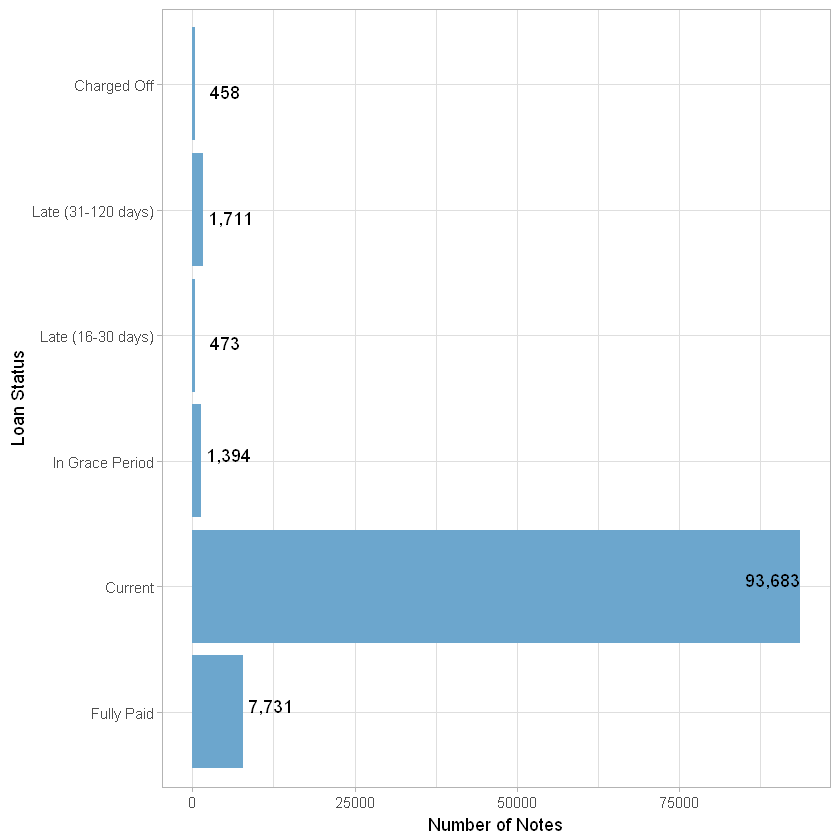

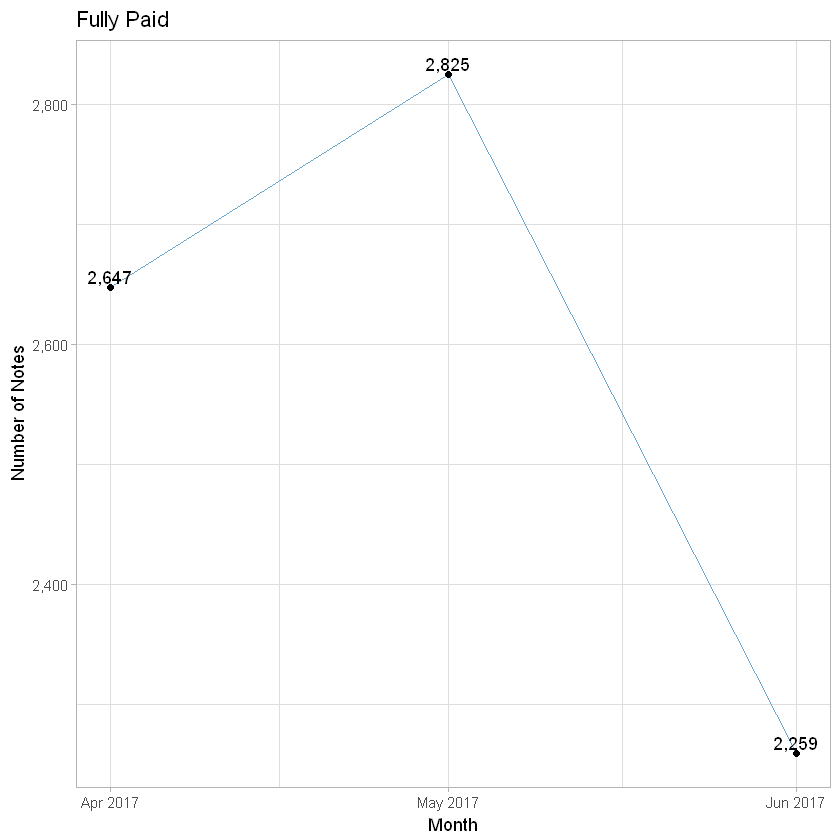

In [22]:
# of notes by loan status YTD
# % of notes by loan status YTD
Sys.setlocale("LC_ALL","English")
YTD_data <- dataset %>%
    filter(month(issue_d) %in% c(select_start_data:select_end_month)) %>%
    group_by(loan_status) %>%
    summarise(num_loan = n()) %>%
    mutate(pct_loan = num_loan/sum(num_loan)) 

YTD_data_disply <- YTD_data %>%
    mutate(pct_dispaly = str_c(round(pct_loan*100,2),"%"))
YTD_display_method = "count" #count or percent

if(YTD_display_method == "count"){
    YTD_data_disply %>% 
        ggplot(mapping = aes(x = loan_status,y = num_loan)) +
        geom_col(fill = "skyblue3") +
        #aethetics
        theme_light() +
        coord_flip() +
        #theme(axis.text.x = element_text(size = rel(1.2),angle = 30, hjust = 1)) +
        #extra info
        geom_text(mapping = aes(label = format(num_loan,big.mark = ",")),vjust="inward",hjust="inward") +
        labs(x = "Loan Status", y = "Number of Notes")
} else if(YTD_display_method == "percent"){
    YTD_data_disply %>% 
        ggplot(mapping = aes(x = loan_status,y = pct_loan)) +
        geom_col(fill = "skyblue3") +
        #aethetics
        theme_light() +
        coord_flip() +
        #theme(axis.text.x = element_text(size = rel(1.2),angle = 30, hjust = 1)) +
        #extra info
        geom_text(mapping = aes(label = pct_dispaly,vjust = -0.3),vjust="inward",hjust="inward") +
        labs(x = "Loan Status", y = "Percentage")
}


#------------------------------------------------------------
tracked_loan_type <- "Fully Paid"


track_plot_data <- dataset %>%
    filter(month(issue_d) %in% c(select_start_data:select_end_month)) %>%
    group_by(issue_d,loan_status) %>%
    summarise(n_notes = n()) %>%
    mutate(ttl_notes = sum(n_notes),
           pct = n_notes/ttl_notes,
           plot_date = ymd(str_replace(issue_d,"[1-9]{2}$","01"))) %>%
    ungroup()

track_plot_data_specific <- track_plot_data %>%
    filter(loan_status ==tracked_loan_type)

track_plot_data_specific %>% 
    ggplot(mapping = aes(x = plot_date, y = n_notes)) +
    geom_line(color = "skyblue3") +
    geom_point() +
    #aesthetics
    scale_x_date(date_labels = "%b %Y",date_breaks = "1 month") +
    scale_y_continuous(labels = comma) +
    theme_light() +
    labs(title = tracked_loan_type) +
    #layer of info
    geom_text(mapping = aes(y = n_notes,label = format(n_notes,big.mark = ",")),vjust = -0.3) +
    labs(x = "Month", y = "Number of Notes")


# track_plot_data_specific %>% 
#     ggplot(mapping = aes(x = plot_date, y = pct)) +
#     geom_line(color = "skyblue3") +
#     geom_point() +
#     #aesthetics
#     theme_light() +
#     scale_y_continuous(labels = percent) +
#     scale_x_date(date_labels = "%b %Y",date_breaks = "1 month") +
#     labs(title = tracked_loan_type) +
#     #layer of info
#     geom_text(mapping = aes(y = pct,label = str_c(round(100*pct,2),"%")),size = 5,vjust = -0.15)





[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

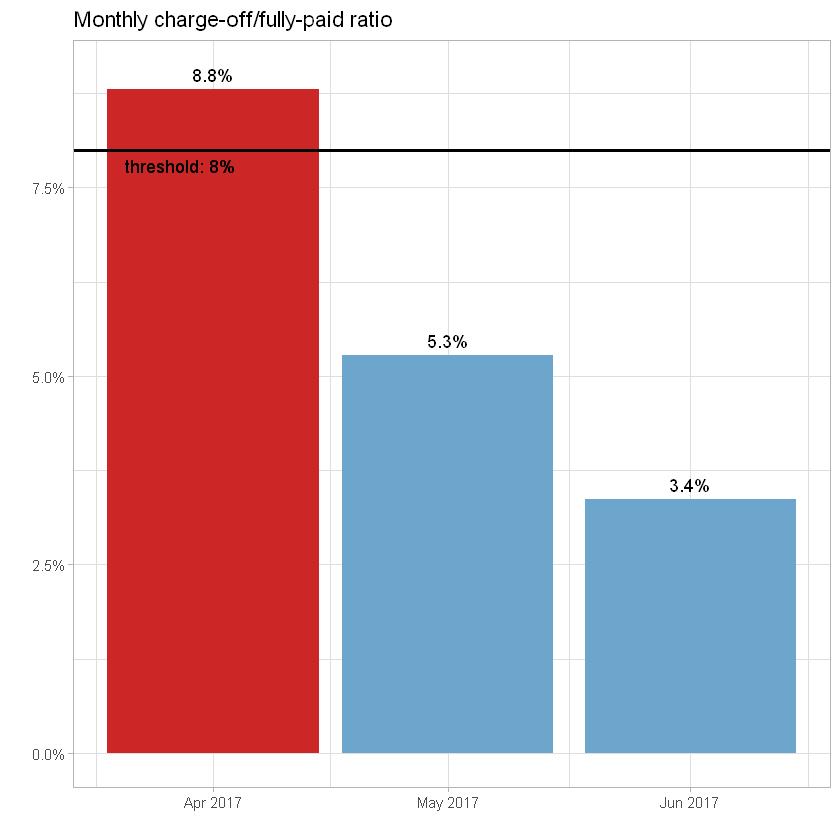

In [23]:
#ratio check
Sys.setlocale("LC_ALL","English")
select_start_data <- 4
select_end_month <- 6
threshold_i <- 0.08

# dataset %>%
#     filter(select_month == month(issue_d)) %>%
#     group_by(loan_status) %>%
#     summarise(num_notes = n()) %>%
#     mutate(ratio = num_notes/sum(num_notes)) %>%
#     filter(loan_status == "Fully Paid" | loan_status == "Charged Off") %>%
#     mutate(type = if_else(loan_status == "Fully Paid",
#                           if_else(ratio < threshold_i,"bad","good"),
#                           if_else(ratio < threshold_i,"good","bad"))) %>%
#     ggplot(mapping = aes(x = loan_status, y = ratio)) +
#     geom_col(mapping = aes(fill = type)) +
#     #aesthetics below
#     scale_y_continuous(labels = percent) +
#     theme_light() +
#     theme(legend.position="none") +
#     #add extra info
#     geom_hline(yintercept = threshold_i, size = 1) +
#     geom_text(mapping = aes(x = 0.7, y = threshold_i - 0.002,label = str_c("threshold: ",threshold_i*100,"%"))) +
#     geom_text(mapping = aes(y = ratio + 0.002,label = str_c(signif(ratio*100,digits = 2),"%"))) +
#     scale_fill_manual(values = c(good = "skyblue3", bad = "firebrick3"))

#It seems like the purpose is to compare ratio between Fully Paid and Charged off

plot_data <- dataset %>%
    filter(month(issue_d) %in% c(select_start_data:select_end_month)) %>%
    group_by(issue_d,loan_status) %>%
    summarise(num_notes = n()) %>%
    filter(loan_status == "Fully Paid" | loan_status == "Charged Off") %>%
    spread(key = loan_status, value = num_notes) %>%
    ungroup() %>%
    mutate(ratio = .[[3]]/.[[2]],
           type = ifelse(ratio < threshold_i, "good", "bad"),
           plot_date = ymd(str_replace(issue_d,"[1-9]{2}$","01"))) 

plot_data %>%
    ggplot(mapping = aes(x = plot_date, y = ratio)) +
    geom_col(mapping = aes(fill = type)) +
    #aesthetics below
    scale_y_continuous(labels = percent) +
    theme_light() +
    theme(legend.position="none") +
    labs(x =  "", y = "", title = "Monthly charge-off/fully-paid ratio") +
    scale_x_date(date_labels = "%b %Y",date_breaks = "1 month") +
    #add extra info
    geom_hline(yintercept = threshold_i, size = 1) +
    geom_text(mapping = aes(x = min(plot_data$plot_date), y = threshold_i - 0.002,label = str_c("threshold: ",threshold_i*100,"%")),hjust = 0.8) +
    geom_text(mapping = aes(y = ratio + 0.002,label = str_c(signif(ratio*100,digits = 2),"%"))) +
    scale_fill_manual(values = c(good = "skyblue3", bad = "firebrick3")) 


